In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from openpmd_viewer import OpenPMDTimeSeries

ts = OpenPMDTimeSeries("/data/gc/rocksdb-index/WarpX/build/bin/diags/diag2/")

geos_minmax_ts = OpenPMDTimeSeries("/data/gc/rocksdb-index/WarpX/build/bin/diags/diag2/", backend='openpmd-api', UseMinMaxIndex=True, MinMaxIndexFileName="/data/gc/rocksdb-index/GEOSIndex/cmake-build-debug/minmaxindex_large")

geos_tree_ts = OpenPMDTimeSeries("/data/gc/rocksdb-index/WarpX/build/bin/diags/diag2/", backend='openpmd-api',
                            geos_index=True,
                            rocksdb_path="/data/gc/rocksdb-index/WarpX/build/bin/diags/diag2/rocksdb")

metadata length: 1879
Open RocksDB successfully! DB path: /data/gc/rocksdb-index/WarpX/build/bin/diags/diag2/rocksdb


read data from disk: z
read data from disk: uz
29007072

read data from disk: w


/data/gc/rocksdb-index/openPMD-viewer/openpmd_viewer/openpmd_timeseries/plotter.py:406: UserWarning: 
CIC particle histogramming is unavailable because 
Numba is not installed. NGP histogramming is used instead.
Please considering installing numba (e.g. `pip install numba`)
  warnings.warn(


the number of particles is: 29007072
CPU times: user 36.9 s, sys: 956 ms, total: 37.9 s
Wall time: 37.7 s


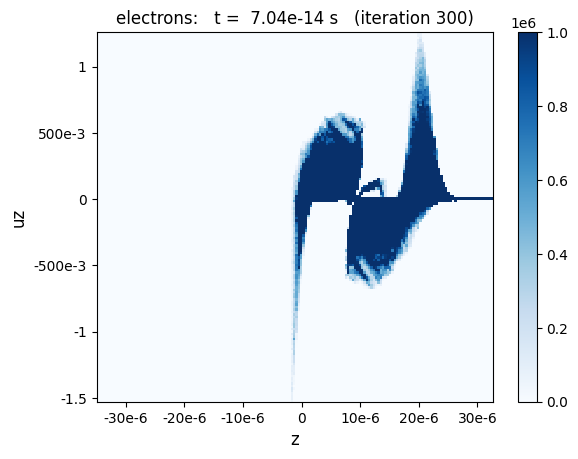

In [2]:
%%time
z_all, uz_all = ts.get_particle( ['z', 'uz'], species='electrons', iteration=300, plot=True, vmax=1e6 )
print(f"the number of particles is: {len(z_all)}")

## 1. One dimension select criteria, e.g. select={'z': xx to xx } in this case

### i) Default openPMD-viewer

In [3]:
%%time
z_selected, uz_selected = ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'z':[2.05e-6, 2.10e-6]})

read data from disk: z
read data from disk: uz
read data from disk: z
23246

CPU times: user 35.7 s, sys: 675 ms, total: 36.4 s
Wall time: 36.2 s


the number of ts selected particles is: 23246
the proportion is: 0.0008013907780833584


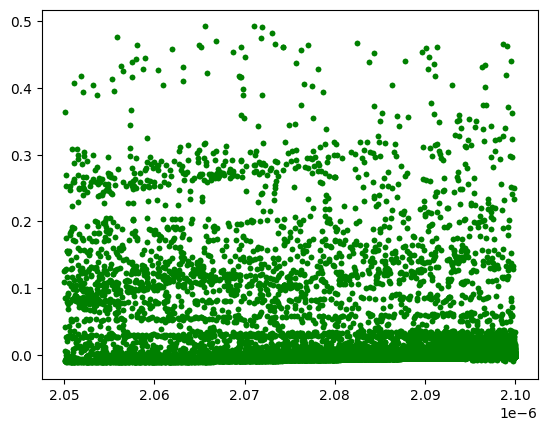

In [4]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### ii) MinMax-Index

In [5]:
%%time
z_selected, uz_selected = geos_minmax_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'z':[2.05e-6, 2.10e-6]})

read data from disk: uz
read data from disk: z
Query by MinMaxIndex and read data size:  924412
23246

CPU times: user 781 ms, sys: 7.96 ms, total: 789 ms
Wall time: 787 ms


the number of ts selected particles is: 23246
the proportion is: 0.0008013907780833584


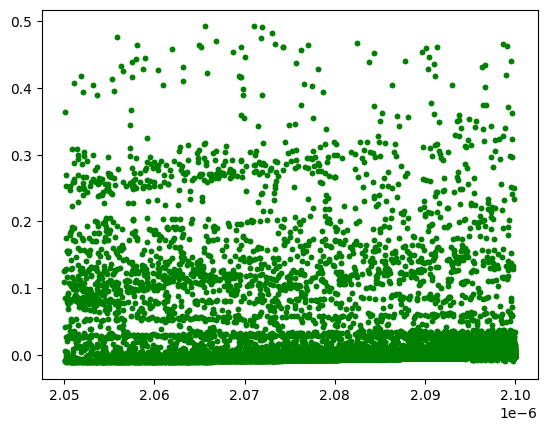

In [6]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### iii) Tree-Index

In [7]:
%%time
z_selected, uz_selected = geos_tree_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'z':[2.05e-6, 2.10e-6]}, direct_block_read=True, only_first_level=True, read_groups=True)

first level match num: 264
read data from disk: uz
read data from disk: z
924412
23246

CPU times: user 89.7 ms, sys: 28.2 ms, total: 118 ms
Wall time: 117 ms


the number of ts selected particles is: 23246
the proportion is: 0.0008013907780833584


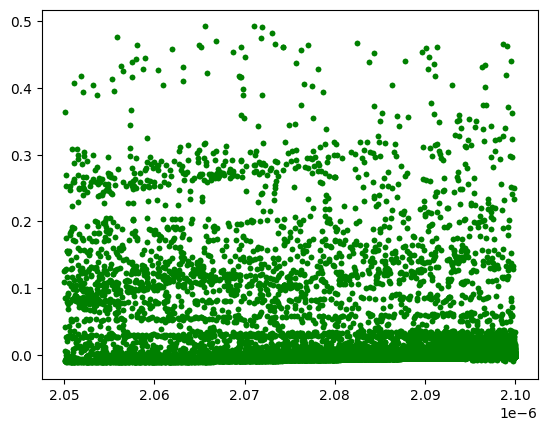

In [8]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

## 2. Three dimension select criteria, e.g. select={'z': xx to xx, 'y', 'x' } in this case

### i) Default openPMD-viewer

In [9]:
%%time
z_selected, uz_selected = ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'x':[5e-6, 10e-6], 'y':[-10e-6, -5e-6], 'z':[15e-6, 25e-6]})

read data from disk: z
read data from disk: uz
read data from disk: x
read data from disk: y
read data from disk: z
138984

CPU times: user 59.5 s, sys: 1.09 s, total: 1min
Wall time: 1min


the number of ts selected particles is: 138984
the proportion is: 0.004791383287496236


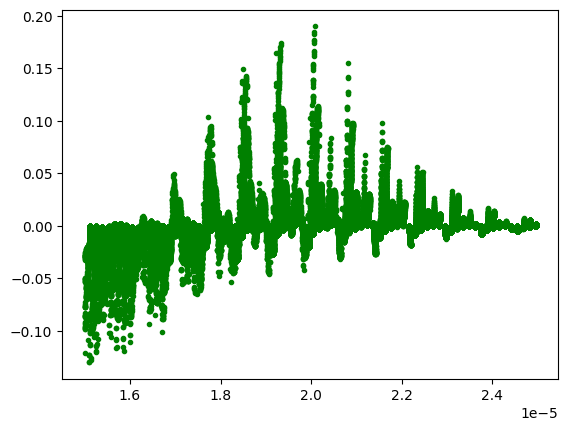

In [10]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### ii) MinMax-Index

In [11]:
%%time
z_selected, uz_selected = geos_minmax_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'x':[5e-6, 10e-6], 'y':[-10e-6, -5e-6], 'z':[15e-6, 25e-6]})

read data from disk: uz
read data from disk: y
read data from disk: z
read data from disk: x
Query by MinMaxIndex and read data size:  509462
138984

CPU times: user 754 ms, sys: 11.8 ms, total: 765 ms
Wall time: 764 ms


the number of ts selected particles is: 138984
the proportion is: 0.004791383287496236


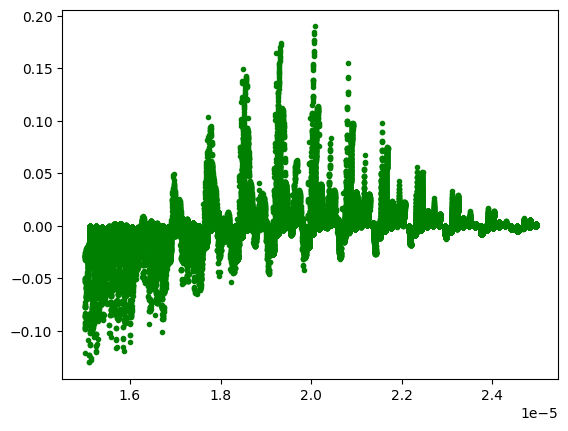

In [12]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### iii) Tree-Index

In [13]:
%%time
z_selected, uz_selected = geos_tree_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'x':[5e-6, 10e-6], 'y':[-10e-6, -5e-6], 'z':[15e-6, 25e-6]},direct_block_read=True, only_first_level=True, read_groups=True)

first level match num: 120
read data from disk: uz
read data from disk: y
read data from disk: z
read data from disk: x
509462
138984

CPU times: user 79.9 ms, sys: 28.3 ms, total: 108 ms
Wall time: 107 ms


the number of ts selected particles is: 138984
the proportion is: 0.004791383287496236


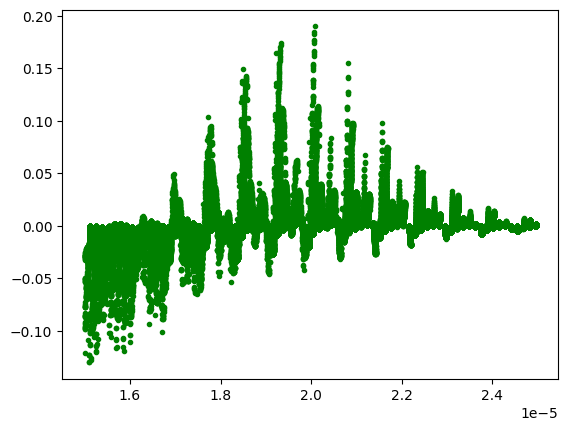

In [14]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

## 3. Two kinds of select criteria, e.g. select={'z': xx to xx, 'uz'} in this case

### i) Default openPMD-viewer

In [15]:
%%time
z_selected, uz_selected = ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'z':[19e-6, 21e-6], 'uz':[0.7, 1.0]})

read data from disk: z
read data from disk: uz
read data from disk: z
read data from disk: uz
12158

CPU times: user 48.1 s, sys: 958 ms, total: 49.1 s
Wall time: 48.8 s


the number of ts selected particles is: 12158
the proportion is: 0.0004191391671658553


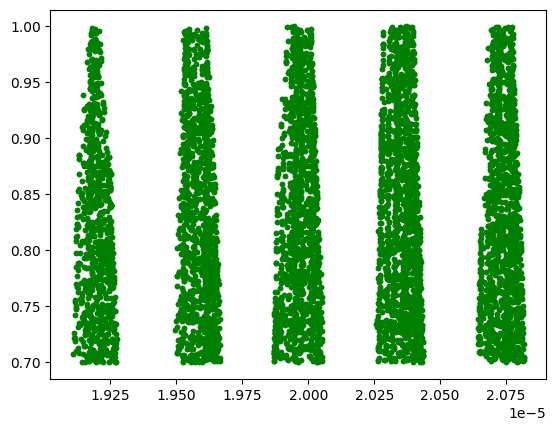

In [16]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### ii) MinMax-Index

In [17]:
%%time
z_selected, uz_selected = geos_minmax_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'z':[19e-6, 21e-6], 'uz':[0.7, 1.0]},
                                                direct_block_read=True, only_first_level=True)

read data from disk: uz
read data from disk: z
Query by MinMaxIndex and read data size:  278994
12158

CPU times: user 198 ms, sys: 8.11 ms, total: 206 ms
Wall time: 205 ms


the number of ts selected particles is: 12158
the proportion is: 0.0004191391671658553


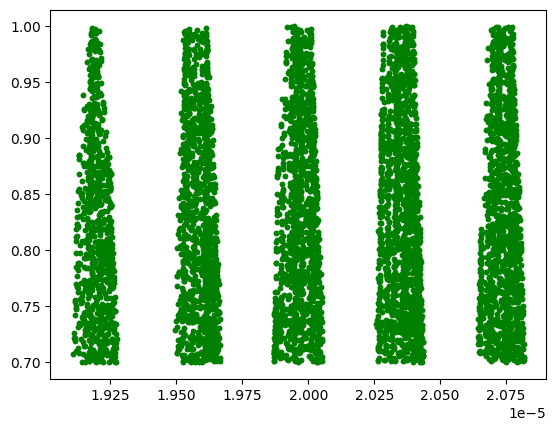

In [18]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### iii) Tree-Index

In [19]:
%%time
z_selected, uz_selected = geos_tree_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'z':[19e-6, 21e-6], 'uz':[0.7, 1.0]}, direct_block_read=True, only_first_level=True, read_groups=True)

first level match num: 792
read data from disk: uz
first level match num: 78
read data from disk: z
278994
12158

CPU times: user 77.6 ms, sys: 20.1 ms, total: 97.7 ms
Wall time: 96.1 ms


the number of ts selected particles is: 12158
the proportion is: 0.0004191391671658553


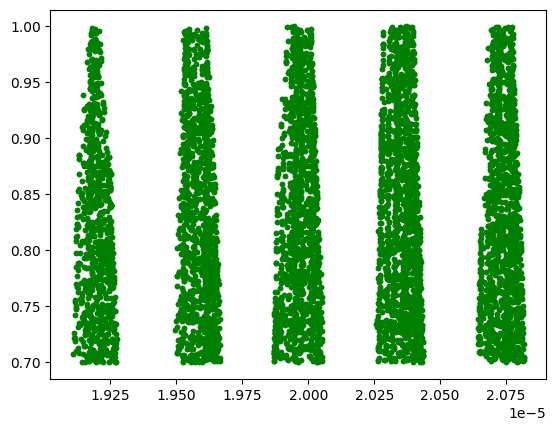

In [20]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

## 4. Two kinds of 3 dimensional select criteria, e.g. select={'z': xx to xx, 'y', 'x', 'ux', 'uy' 'uz'} in this case

### i) Default openPMD-viewer

In [21]:
%%time
z_selected, uz_selected = ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'x':[5e-6, 10e-6], 'y':[5e-6, 10e-6], 'z':[15e-6, 30e-6],
                                                   'ux':[0.0, 0.001], 'uy':[0.0, 0.001], 'uz':[0.0, 0.001]})

read data from disk: z
read data from disk: uz
read data from disk: x
read data from disk: y
read data from disk: z
read data from disk: ux
read data from disk: uy
read data from disk: uz
55

CPU times: user 1min 35s, sys: 1.98 s, total: 1min 37s
Wall time: 1min 36s


the number of ts selected particles is: 55
the proportion is: 1.8960893398685672e-06


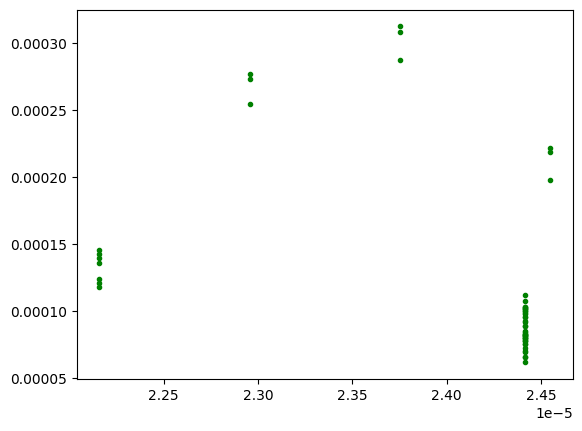

In [22]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### ii) MinMax-Index

In [23]:
%%time
z_selected, uz_selected = geos_minmax_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'x':[5e-6, 10e-6], 'y':[5e-6, 10e-6], 'z':[15e-6, 30e-6],
                                                   'ux':[0.0, 0.001], 'uy':[0.0, 0.001], 'uz':[0.0, 0.001]})

read data from disk: y
read data from disk: z
read data from disk: uz
read data from disk: ux
read data from disk: uy
read data from disk: x
Query by MinMaxIndex and read data size:  461359
55

CPU times: user 1.2 s, sys: 56.5 ms, total: 1.26 s
Wall time: 1.19 s


the number of ts selected particles is: 55
the proportion is: 1.8960893398685672e-06


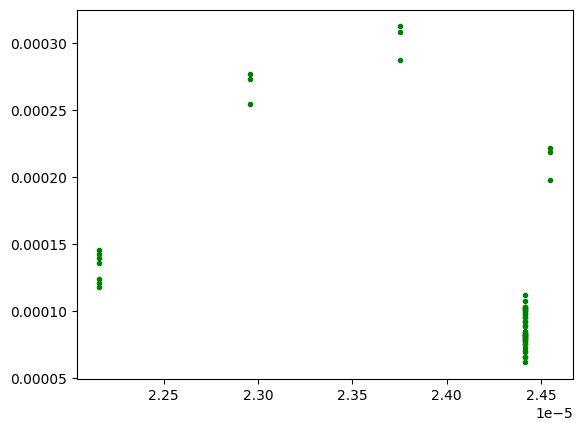

In [24]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### iii) Tree-Index

In [25]:
%%time
z_selected, uz_selected = geos_tree_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'x':[5e-6, 10e-6], 'y':[5e-6, 10e-6], 'z':[15e-6, 30e-6],
                                                   'ux':[0.0, 0.001], 'uy':[0.0, 0.001], 'uz':[0.0, 0.001]},
                                                direct_block_read=True, only_first_level=True, read_groups=True)

first level match num: 180
read data from disk: y
first level match num: 3942
read data from disk: z
read data from disk: uz
read data from disk: ux
read data from disk: uy
read data from disk: x
461359
55

CPU times: user 150 ms, sys: 104 ms, total: 253 ms
Wall time: 176 ms


the number of ts selected particles is: 55
the proportion is: 1.8960893398685672e-06


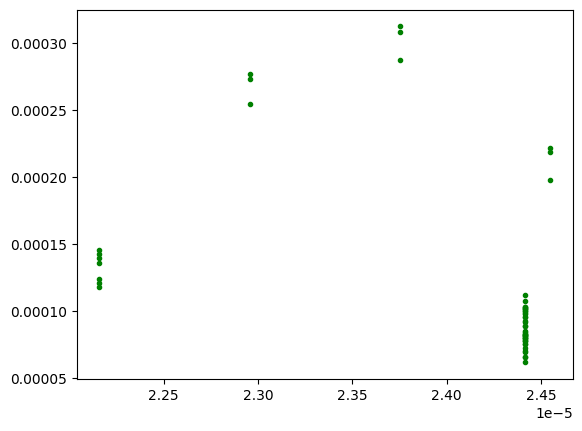

In [26]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')